In [1]:
import os
import logging
import config
from data_loader import load_data, setup_logging
from model import *  # Assuming this is your model module
import tensorflow as tf
from evaluation import *  # Assuming this is your evaluation module

# Set up logging
logger = setup_logging(
    log_level=logging.INFO,  # Can be adjusted to logging.DEBUG for more details
    log_file='data_processing.log'  # Optional: log to a file
)


In [2]:
import os
import logging
from config import DATA_PATH
from data_loader import load_data 
from data_loader import *

# Setup logging
logger = logging.getLogger(__name__)

try:
    # Print and log current working directory
    current_dir = os.getcwd()
    logger.info(f"Current working directory: {current_dir}")
    print(f"Current working directory: {current_dir}")

    # Verify file path
    file_path = DATA_PATH
    logger.info(f"Config file path: {file_path}")
    print(f"Config file path: {file_path}")

    # Check if the dataset file exists
    if not os.path.isfile(file_path):
        logger.error(f"Dataset file not found at {file_path}")
        raise FileNotFoundError(f"Error: The dataset file was not found at {file_path}")

    # Load and preprocess data
    logger.info("Starting data loading process")
    X_raw, y = load_data(file_path)

    # Log and print data confirmation
    logger.info(f"Data Loaded: X shape = {X_raw.shape}, y shape = {y.shape}")
    print(f"Data Loaded: X shape = {X_raw.shape}, y shape = {y.shape}")

    # Log and print top 5 rows
    logger.info("Top 5 rows of X_raw:")
    logger.info(X_raw.head().to_string())
    print("\nTop 5 rows of X_raw:")
    print(X_raw.head())

    logger.info("Top 5 rows of y:")
    logger.info(y.head().to_string())
    print("\nTop 5 rows of y:")
    print(y.head())

    logger.info("Data loading and initial processing completed successfully")

except Exception as e:
    logger.error(f"An error occurred during data processing: {e}", exc_info=True)
    raise


Current working directory: C:\Users\samee\Untitled Folder 1
Config file path: C:\Users\samee\Desktop\ML Engineer project\MLE-Assignment.csv
2025-03-25 21:51:06,256 - DataProcessingLogger - INFO - Loading data from: C:\Users\samee\Desktop\ML Engineer project\MLE-Assignment.csv
2025-03-25 21:51:06,425 - DataProcessingLogger - INFO - Data loaded successfully. Shape: (500, 450)
2025-03-25 21:51:06,593 - DataProcessingLogger - INFO - Features shape: (500, 448), Target shape: (500,)
Data Loaded: X shape = (500, 448), y shape = (500,)

Top 5 rows of X_raw:
          0         1         2         3         4         5         6  \
0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.4582

In [3]:
#!pip install tensorflow xgboost optuna --user

In [4]:
# EDA
print(generate_summary_statistics(X_raw, y))

     count      mean       std       min       25%       50%       75%  \
0    500.0  0.443118  0.044719  0.311182  0.410456  0.449105  0.480245   
1    500.0  0.440761  0.045520  0.295321  0.404310  0.442651  0.478822   
2    500.0  0.433814  0.045764  0.284064  0.397038  0.434215  0.473158   
3    500.0  0.426122  0.046070  0.282054  0.389029  0.425074  0.464947   
4    500.0  0.418990  0.045405  0.296702  0.382102  0.417075  0.459232   
..     ...       ...       ...       ...       ...       ...       ...   
443  500.0  0.739850  0.053487  0.575259  0.701690  0.744004  0.775698   
444  500.0  0.738738  0.053601  0.571767  0.700638  0.743965  0.775686   
445  500.0  0.738298  0.054014  0.577803  0.698655  0.743301  0.775621   
446  500.0  0.737599  0.054136  0.576985  0.698107  0.745216  0.774635   
447  500.0  0.738099  0.054297  0.562302  0.699673  0.745733  0.774310   

          max  target_corr  
0    0.556287    -0.072485  
1    0.530168    -0.067926  
2    0.528774    -0.0788

In [5]:
handle_missing_data(X_raw, strategy='mean')

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       438       439       440  \
0    0.343350  0.344837  0.361567  ...  0.680883  0.710280  0.717482   
1    0.363689  0.373883  0.359674  ...  0.701600  0.684011  0.697271   
2    0.330841  0.328925  0.323854  ...  0.671400  0.683054  0.669286   
3    0.427737  0.415360  0.413106  ...  0.728588  0.742782  0.730801   
4    0.440782  0.426193  0.430482  ...  0.779194  0.770227  0.773013   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.741594  0.747858  0.730535   
496  0.342974  0.352137  0.327545  ...  0.642285  0.670232  0.659045   
497  0.462927  0.442647  0.437731  ...  0.784919  0.787532  0.780347   
498  0.447362  0.451952  0.427200  ...  0.748725  0.739432  0.759722   
499  0.388811  0.382484  0.386995  ...  0.724255  0.717509  0.726149   

          441       442       443       444       445       446       447  
0    0.715078  0.705379  0.696691  0.692793  0.711369  0.697679  0.704520  
1    0.701995  0.696077  0.701012  0.677418  0.696921  0.696544  0.689054  
2    0.663179  0.676165  0.676591  0.655951  0.658945  0.670989  0.665176  
3    0.736787  0.730044  0.751437  0.738497  0.742446  0.754657  0.733474  
4    0.761431  0.763488  0.762473  0.744012  0.775486  0.760431  0.751988  
..        ...       ...       ...       ...       ...       ...       ...  
495  0.716969  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839  
496  0.661587  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733  
497  0.768362  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187  
498  0.752118  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383  
499  0.728631  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706  

[500 rows x 448 columns]

In [6]:
X_scaled = preprocess_data(X_raw)
print(f"Preprocessed Data Shape: {X_scaled.shape}")

2025-03-25 21:51:08,200 - DataProcessingLogger - INFO - Starting data preprocessing
2025-03-25 21:51:08,229 - DataProcessingLogger - INFO - Data preprocessing completed
Preprocessed Data Shape: (500, 448)


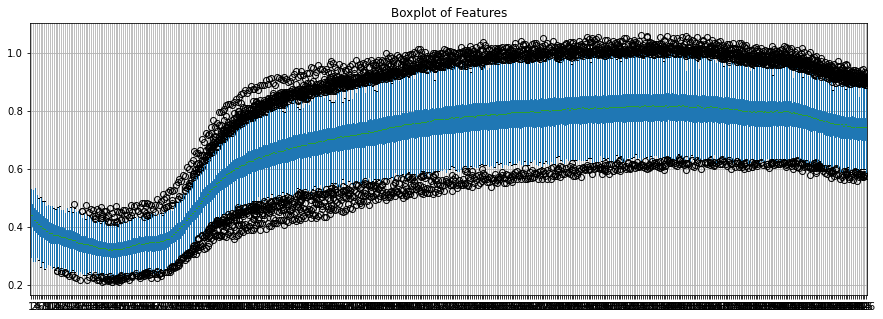

In [7]:
plot_boxplots(X_raw)


Boxplot of Spectral Reflectance Features:

There are outliers in the spectral reflectance values, especially at lower and higher wavelengths. These need to be flagged or removed to avoid skewing the model.

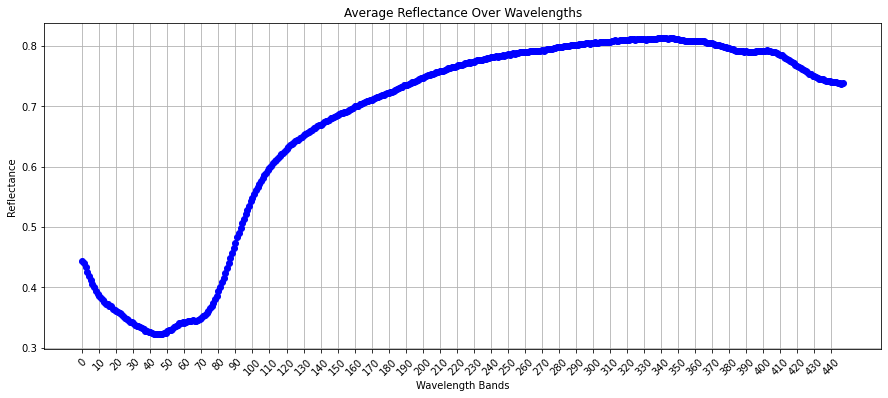

In [8]:
plot_spectral_reflectance(X_raw)

Key Observations from Visualizations: Line Plot (Average Reflectance Over Wavelengths): Wavelengths which is been set or taken in the interval of 10

Reflectance increases sharply at lower wavelengths, stabilizes in the middle range, and slightly declines at higher wavelengths.

This trend suggests that certain wavelength ranges are more reflective and might be more predictive.

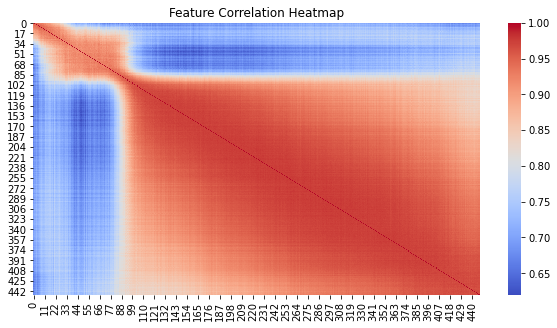

In [9]:
plot_sample_heatmap(X_scaled)

Strong correlations exist between adjacent wavelength bands, indicating redundancy in features. Dimensionality reduction techniques like PCA can help reduce this redundancy without losing essential information.

In [10]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

# Z-Score method
outlier_indices = detect_outliers_multiple_methods(X_raw, method='z_score')
logger.info(f"Number of outliers detected (Z-Score method): {len(outlier_indices)}")
logger.info(f"First 10 outlier indices for Z-Score: {list(outlier_indices)[:10]}")
logger.info("-" * 50)

# IQR method
outlier_indices = detect_outliers_multiple_methods(X_raw, method='iqr')
logger.info(f"Number of outliers detected (IQR method): {len(outlier_indices)}")
logger.info(f"First 10 outlier indices for IQR: {list(outlier_indices)[:10]}")
logger.info("-" * 50)

# Isolation Forest method
outlier_indices = detect_outliers_multiple_methods(X_raw, method='isolation_forest')
logger.info(f"Number of outliers detected (Isolation Forest method): {len(outlier_indices)}")
logger.info(f"First 10 outlier indices for Isolation Forest: {list(outlier_indices)[:10]}")
logger.info("-" * 50)


2025-03-25 21:51:25,797 - INFO - NumExpr defaulting to 8 threads.
2025-03-25 21:51:26,098 - INFO - Number of outliers detected (Z-Score method): 29
2025-03-25 21:51:26,099 - INFO - First 10 outlier indices for Z-Score: [24, 35, 57, 89, 96, 102, 107, 120, 125, 148]
2025-03-25 21:51:26,101 - INFO - --------------------------------------------------


Outlier Detection Summary:
Z Score: 29 outliers
Iqr: 36 outliers
Isolation Forest: 50 outliers


2025-03-25 21:51:26,361 - INFO - Number of outliers detected (IQR method): 36
2025-03-25 21:51:26,361 - INFO - First 10 outlier indices for IQR: [24, 35, 54, 57, 61, 89, 96, 102, 107, 116]
2025-03-25 21:51:26,364 - INFO - --------------------------------------------------


Outlier Detection Summary:
Z Score: 29 outliers
Iqr: 36 outliers
Isolation Forest: 50 outliers


2025-03-25 21:51:26,615 - INFO - Number of outliers detected (Isolation Forest method): 50
2025-03-25 21:51:26,616 - INFO - First 10 outlier indices for Isolation Forest: [24, 35, 44, 53, 61, 80, 89, 96, 102, 107]
2025-03-25 21:51:26,618 - INFO - --------------------------------------------------


Outlier Detection Summary:
Z Score: 29 outliers
Iqr: 36 outliers
Isolation Forest: 50 outliers


In [11]:
# Remove outliers from both X and y
X_cleaned, y_cleaned = remove_outliers((X_raw, y), method='isolation_forest')

# Print shapes to verify
print(f"Original X shape: {X_raw.shape}")
print(f"Original y shape: {y.shape}")
print(f"Cleaned X shape: {X_cleaned.shape}")
print(f"Cleaned y shape: {y_cleaned.shape}")


2025-03-25 21:51:26,631 - DataProcessingLogger - INFO - Removing outliers using isolation_forest method


2025-03-25 21:51:26,631 - INFO - Removing outliers using isolation_forest method


Outlier Detection Summary:
Z Score: 29 outliers
Iqr: 36 outliers
Isolation Forest: 50 outliers
2025-03-25 21:51:26,921 - DataProcessingLogger - INFO - Number of outliers detected: 50


2025-03-25 21:51:26,921 - INFO - Number of outliers detected: 50


Original X shape: (500, 448)
Original y shape: (500,)
Cleaned X shape: (450, 448)
Cleaned y shape: (450,)


In [12]:
X_cleaned

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       438       439       440  \
0    0.343350  0.344837  0.361567  ...  0.680883  0.710280  0.717482   
1    0.363689  0.373883  0.359674  ...  0.701600  0.684011  0.697271   
2    0.330841  0.328925  0.323854  ...  0.671400  0.683054  0.669286   
3    0.427737  0.415360  0.413106  ...  0.728588  0.742782  0.730801   
4    0.440782  0.426193  0.430482  ...  0.779194  0.770227  0.773013   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.741594  0.747858  0.730535   
496  0.342974  0.352137  0.327545  ...  0.642285  0.670232  0.659045   
497  0.462927  0.442647  0.437731  ...  0.784919  0.787532  0.780347   
498  0.447362  0.451952  0.427200  ...  0.748725  0.739432  0.759722   
499  0.388811  0.382484  0.386995  ...  0.724255  0.717509  0.726149   

          441       442       443       444       445       446       447  
0    0.715078  0.705379  0.696691  0.692793  0.711369  0.697679  0.704520  
1    0.701995  0.696077  0.701012  0.677418  0.696921  0.696544  0.689054  
2    0.663179  0.676165  0.676591  0.655951  0.658945  0.670989  0.665176  
3    0.736787  0.730044  0.751437  0.738497  0.742446  0.754657  0.733474  
4    0.761431  0.763488  0.762473  0.744012  0.775486  0.760431  0.751988  
..        ...       ...       ...       ...       ...       ...       ...  
495  0.716969  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839  
496  0.661587  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733  
497  0.768362  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187  
498  0.752118  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383  
499  0.728631  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706  

[450 rows x 448 columns]

In [13]:
y_cleaned

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 450, dtype: float64

In [14]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

try:
    logger.info("Starting sensor drift detection on cleaned data...")

    # Run sensor drift detection
    drift_results = detect_sensor_drift(X_cleaned)

    # Log results
    logger.info("Sensor drift detection completed successfully.")
    logger.info(f"Drift detection results summary:\n{drift_results}")

except Exception as e:
    logger.error(f"Error during sensor drift detection: {e}", exc_info=True)


2025-03-25 21:51:27,005 - INFO - Starting sensor drift detection on cleaned data...
2025-03-25 21:51:27,906 - INFO - Sensor drift detection completed successfully.
2025-03-25 21:51:27,914 - INFO - Drift detection results summary:
             0         1         2         3         4         5         6  \
mean  0.447173  0.444863  0.437404  0.429740  0.422835  0.415926  0.409189   
std   0.040520  0.041682  0.042126  0.042398  0.042028  0.041534  0.041000   

             7         8         9  ...       438       439       440  \
mean  0.402823  0.397355  0.392587  ...  0.742472  0.741489  0.740921   
std   0.040386  0.039938  0.039989  ...  0.042395  0.042134  0.042289   

           441       442       443       444       445       446       447  
mean  0.740819  0.739818  0.739843  0.738758  0.738339  0.737789  0.738154  
std   0.041961  0.042235  0.042190  0.042485  0.042878  0.043327  0.042664  

[2 rows x 448 columns]


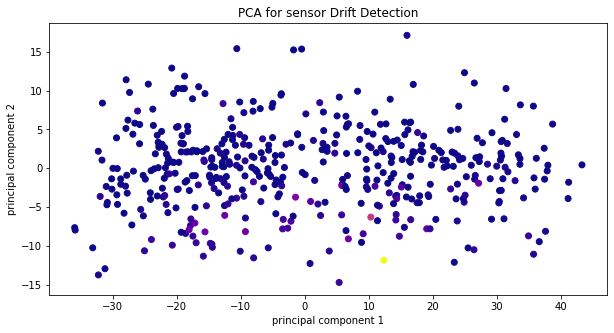

In [15]:
detect_sensor_drift_PCA(X_cleaned,y_cleaned)

The spread of points is relatively evenly distributed, meaning there is no clear trend of shift in any one direction. It is found that yes there was for sensor drift or inconsistencies through checks

Color Distribution:

Dark Blue Points: Represent the majority of data, indicating normal sensor readings.

Yellow, Orange, and Red Points: These are likely outliers or drifted points, suggesting that the sensor readings in these regions deviate from the normal.

The presence of these anomalous points, particularly in the lower region (PC2 ~ -10 to -15) and the right side (PC1 ~ 10 to 20), suggests that certain sensors may have experienced drift over time, warranting further investigation.

In [16]:
create_spectral_indices(X_raw)

0         1         2         3         4         5         6  \
0    0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1    0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2    0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3    0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4    0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.478140  0.444033  0.442120  0.437473  0.428672  0.413238  0.417758   
496  0.409367  0.394941  0.380236  0.375340  0.346122  0.354650  0.361170   
497  0.486526  0.501372  0.500175  0.508139  0.489411  0.457311  0.462321   
498  0.464595  0.498822  0.489077  0.453381  0.487636  0.461950  0.461671   
499  0.460840  0.457656  0.434632  0.412675  0.418638  0.408338  0.403807   

            7         8         9  ...       439       440       441  \
0    0.343350  0.344837  0.361567  ...  0.710280  0.717482  0.715078   
1    0.363689  0.373883  0.359674  ...  0.684011  0.697271  0.701995   
2    0.330841  0.328925  0.323854  ...  0.683054  0.669286  0.663179   
3    0.427737  0.415360  0.413106  ...  0.742782  0.730801  0.736787   
4    0.440782  0.426193  0.430482  ...  0.770227  0.773013  0.761431   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.420388  0.413290  0.402912  ...  0.747858  0.730535  0.716969   
496  0.342974  0.352137  0.327545  ...  0.670232  0.659045  0.661587   
497  0.462927  0.442647  0.437731  ...  0.787532  0.780347  0.768362   
498  0.447362  0.451952  0.427200  ...  0.739432  0.759722  0.752118   
499  0.388811  0.382484  0.386995  ...  0.717509  0.726149  0.728631   

          442       443       444       445       446       447       ndi  
0    0.705379  0.696691  0.692793  0.711369  0.697679  0.704520  0.013121  
1    0.696077  0.701012  0.677418  0.696921  0.696544  0.689054  0.003926  
2    0.676165  0.676591  0.655951  0.658945  0.670989  0.665176  0.054957  
3    0.730044  0.751437  0.738497  0.742446  0.754657  0.733474  0.026847  
4    0.763488  0.762473  0.744012  0.775486  0.760431  0.751988  0.062782  
..        ...       ...       ...       ...       ...       ...       ...  
495  0.739297  0.724827  0.720484  0.740626  0.740116  0.721839  0.018866  
496  0.658422  0.644254  0.646479  0.656779  0.646700  0.646733  0.001254  
497  0.771411  0.770919  0.761464  0.770314  0.763324  0.797187  0.030605  
498  0.761910  0.761111  0.730431  0.753545  0.749619  0.756383  0.058141  
499  0.725808  0.716943  0.718320  0.707611  0.729484  0.718706  0.066942  

[500 rows x 449 columns]

In [17]:
X_scaled = preprocess_data(X_cleaned)
print(f"Preprocessed Data Shape: {X_scaled.shape}")

2025-03-25 21:51:28,414 - DataProcessingLogger - INFO - Starting data preprocessing


2025-03-25 21:51:28,414 - INFO - Starting data preprocessing


2025-03-25 21:51:28,433 - DataProcessingLogger - INFO - Data preprocessing completed


2025-03-25 21:51:28,433 - INFO - Data preprocessing completed


Preprocessed Data Shape: (450, 448)


In [18]:
X_train,X_test,y_train,y_test = split_data(X_scaled,y_cleaned)

In [19]:
X_train.shape

(360, 448)

In [20]:
X_test.shape

(90, 448)

In [21]:
try:
    # Log model building process
    logger.info(f"Building Neural Network Model")
    logger.info(f"Input Shape: {X_train.shape[1]} features")
    
    # Build the model
    model = build_simple_nn(X_train.shape[1])
    
    # Log model compilation
    logger.info("Compiling the model")
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    
    # Log training process
    logger.info("Starting model training")
    logger.info(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
    
    # Train the model with training data
    trained_model = train_model(model, X_train, y_train)
    
    logger.info("Model training completed successfully")

except Exception as e:
    logger.error(f"Error in model building and training: {e}", exc_info=True)
    raise



2025-03-25 21:51:28,496 - INFO - Building Neural Network Model
2025-03-25 21:51:28,497 - INFO - Input Shape: 448 features
2025-03-25 21:51:28,498 - INFO - Building Neural Network
2025-03-25 21:51:28,499 - INFO - Model Configuration: input_shape=448, n_units=256, learning_rate=0.0005, dropout_rate=0.2
2025-03-25 21:51:28,843 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:51:28,844 - INFO - Compiling the model
2025-03-25 21:51:28,854 - INFO - Starting model training
2025-03-25 21:51:28,855 - INFO - Training data shape: X_train=(360, 448), y_train=(360,)
2025-03-25 21:51:28,856 - INFO - Starting model training
2025-03-25 21:51:28,857 - INFO - Training Configuration: Model Type=Sequential, Epochs=50, Batch Size=32
2025-03-25 21:51:35,377 - INFO - Model training completed successfully
2025-03-25 21:51:35,379 - INFO - Model training completed successfully


In [22]:
# Build the XGBoost model
logger.info("Building XGBoost model with 200 estimators and 0.05 learning rate")
xgb_model = build_xgboost(n_estimators=200, learning_rate=0.05)

# Train the model
logger.info(f"Training XGBoost model with training data: X_train shape={X_train.shape}, y_train shape={y_train.shape}")
xgb_model.fit(X_train, y_train)
logger.info("XGBoost model training completed successfully")

# Make predictions
logger.info(f"Making predictions with XGBoost model. X_test shape: {X_test.shape}")
y_pred = xgb_model.predict(X_test)
logger.info("Predictions completed")

# Evaluate the model
from sklearn.metrics import mean_squared_error
logger.info("Calculating Mean Squared Error")
mse = mean_squared_error(y_test, y_pred)
logger.info(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {mse}")


2025-03-25 21:51:35,400 - INFO - Building XGBoost model with 200 estimators and 0.05 learning rate
2025-03-25 21:51:35,402 - INFO - Building XGBoost Regression Model
2025-03-25 21:51:35,404 - INFO - Model Configuration: n_estimators=200, learning_rate=0.05
2025-03-25 21:51:35,406 - INFO - XGBoost model configured successfully
2025-03-25 21:51:35,408 - INFO - Training XGBoost model with training data: X_train shape=(360, 448), y_train shape=(360,)
2025-03-25 21:51:44,414 - INFO - XGBoost model training completed successfully
2025-03-25 21:51:44,416 - INFO - Making predictions with XGBoost model. X_test shape: (90, 448)
2025-03-25 21:51:44,423 - INFO - Predictions completed
2025-03-25 21:51:44,424 - INFO - Calculating Mean Squared Error
2025-03-25 21:51:44,427 - INFO - Mean Squared Error: 71010627.80588344


Mean Squared Error: 71010627.80588344


In [23]:
# Build the XGBoost model
logger.info("Building XGBoost model with 200 estimators and 0.05 learning rate")
xgb_model = build_xgboost(n_estimators=200, learning_rate=0.05)

# Perform cross-validation
logger.info(f"Performing cross-validation with {5} splits on XGBoost model")
logger.info(f"Input data shapes - X: {X_scaled.shape}, y: {y_cleaned.shape}")
cv_results = cross_validate(xgb_model, X_scaled, y_cleaned, n_splits=5)

# Print results
logger.info("Cross-validation results obtained")
logger.info(f"Mean MAE: {cv_results['mean_mae']}")
logger.info(f"Standard Deviation of MAE: {cv_results['std_mae']}")
print(f"Mean MAE: {cv_results['mean_mae']}")
print(f"Standard Deviation of MAE: {cv_results['std_mae']}")

2025-03-25 21:51:44,441 - INFO - Building XGBoost model with 200 estimators and 0.05 learning rate
2025-03-25 21:51:44,443 - INFO - Building XGBoost Regression Model
2025-03-25 21:51:44,444 - INFO - Model Configuration: n_estimators=200, learning_rate=0.05
2025-03-25 21:51:44,445 - INFO - XGBoost model configured successfully
2025-03-25 21:51:44,447 - INFO - Performing cross-validation with 5 splits on XGBoost model
2025-03-25 21:51:44,448 - INFO - Input data shapes - X: (450, 448), y: (450,)
2025-03-25 21:51:44,449 - INFO - Performing 5-fold Cross-Validation
2025-03-25 21:51:44,451 - INFO - Cross-validation fold 1/5
2025-03-25 21:51:44,454 - INFO - Starting model training
2025-03-25 21:51:44,455 - INFO - Training Configuration: Model Type=XGBRegressor, Epochs=50, Batch Size=32
2025-03-25 21:51:48,575 - INFO - Model training completed successfully
2025-03-25 21:51:48,580 - INFO - Fold 1 MAE: 3123.6626378377277
2025-03-25 21:51:48,581 - INFO - Cross-validation fold 2/5
2025-03-25 21:51:

Mean MAE: 2495.891231396993
Standard Deviation of MAE: 622.7688031077272


In [24]:
# Custom number of trials
logger.info("Starting neural network hyperparameter optimization")
logger.info(f"Optimization configuration: n_trials=100, seed=42")
best_params = optimize_nn_hyperparams(
   X_train, 
   y_train, 
   X_test, 
   y_test, 
   n_trials=100,  # Increase number of trials for more comprehensive search
   #seed=42  # Add seed parameter
)
logger.info("Hyperparameter optimization completed")
logger.info(f"Best hyperparameters: {best_params}")

# After getting best parameters, you can build and train final model
logger.info("Building final neural network model with optimized hyperparameters")
final_model = build_simple_nn(
   input_shape=X_train.shape[1], 
   **best_params,
   #seed=42  # Add seed parameter to ensure reproducibility
)

# Fit the model
logger.info(f"Training final model: X_train shape={X_train.shape}, y_train shape={y_train.shape}")
final_model.fit(
   X_train, 
   y_train, 
   epochs=50, 
   validation_data=(X_test, y_test),
   verbose=0
)
logger.info("Model training completed")

# Evaluate the model
logger.info("Evaluating model on test data")
test_loss, test_mae = final_model.evaluate(X_test, y_test)
logger.info(f"Test MAE: {test_mae}")
print(f"Test MAE: {test_mae}")

2025-03-25 21:52:04,471 - INFO - Starting neural network hyperparameter optimization
2025-03-25 21:52:04,473 - INFO - Optimization configuration: n_trials=100, seed=42
2025-03-25 21:52:04,475 - INFO - Starting Hyperparameter Optimization
2025-03-25 21:52:04,477 - INFO - Number of trials: 100
2025-03-25 21:52:04,478 - INFO - Training data shape: (360, 448)
2025-03-25 21:52:04,478 - INFO - Validation data shape: (90, 448)
[I 2025-03-25 21:52:04,480] A new study created in memory with name: no-name-c2270bd9-a8d4-4daa-b3ad-55923bd684ad
2025-03-25 21:52:04,482 - INFO - Trial 0 parameters: {'n_units': 88, 'learning_rate': 0.0028938413456990777, 'dropout_rate': 0.1643118066041839}
2025-03-25 21:52:04,485 - INFO - Building Neural Network
2025-03-25 21:52:04,485 - INFO - Model Configuration: input_shape=448, n_units=88, learning_rate=0.0028938413456990777, dropout_rate=0.1643118066041839
2025-03-25 21:52:04,620 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:52:07,52

2025-03-25 21:52:38,215 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:52:40,645 - INFO - Trial 10 MAE: 2049.900634765625
[I 2025-03-25 21:52:40,647] Trial 10 finished with value: 2049.900634765625 and parameters: {'n_units': 97, 'learning_rate': 0.00895833646173081, 'dropout_rate': 0.24870542391149073}. Best is trial 9 with value: 1772.795166015625.
2025-03-25 21:52:40,679 - INFO - Trial 11 parameters: {'n_units': 200, 'learning_rate': 0.006706197555715415, 'dropout_rate': 0.22267007477591463}
2025-03-25 21:52:40,681 - INFO - Building Neural Network
2025-03-25 21:52:40,682 - INFO - Model Configuration: input_shape=448, n_units=200, learning_rate=0.006706197555715415, dropout_rate=0.22267007477591463
2025-03-25 21:52:40,792 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:52:44,687 - INFO - Trial 11 MAE: 1921.0560302734375
[I 2025-03-25 21:52:44,688] Trial 11 finished with value: 1921.0560302734375 and parameters: {'n_units': 200,

2025-03-25 21:53:22,112 - INFO - Trial 21 MAE: 1742.90576171875
[I 2025-03-25 21:53:22,114] Trial 21 finished with value: 1742.90576171875 and parameters: {'n_units': 223, 'learning_rate': 0.00955758106438777, 'dropout_rate': 0.193490076312904}. Best is trial 20 with value: 1725.584228515625.
2025-03-25 21:53:22,147 - INFO - Trial 22 parameters: {'n_units': 222, 'learning_rate': 0.009856131905890917, 'dropout_rate': 0.20220001159449563}
2025-03-25 21:53:22,148 - INFO - Building Neural Network
2025-03-25 21:53:22,148 - INFO - Model Configuration: input_shape=448, n_units=222, learning_rate=0.009856131905890917, dropout_rate=0.20220001159449563
2025-03-25 21:53:22,253 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:53:25,444 - INFO - Trial 22 MAE: 1975.2861328125
[I 2025-03-25 21:53:25,446] Trial 22 finished with value: 1975.2861328125 and parameters: {'n_units': 222, 'learning_rate': 0.009856131905890917, 'dropout_rate': 0.20220001159449563}. Best is trial 20

2025-03-25 21:54:28,090 - INFO - Trial 33 parameters: {'n_units': 235, 'learning_rate': 0.008285970141298985, 'dropout_rate': 0.40610005674825195}
2025-03-25 21:54:28,091 - INFO - Building Neural Network
2025-03-25 21:54:28,093 - INFO - Model Configuration: input_shape=448, n_units=235, learning_rate=0.008285970141298985, dropout_rate=0.40610005674825195
2025-03-25 21:54:28,166 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:54:30,610 - INFO - Trial 33 MAE: 1809.881103515625
[I 2025-03-25 21:54:30,612] Trial 33 finished with value: 1809.881103515625 and parameters: {'n_units': 235, 'learning_rate': 0.008285970141298985, 'dropout_rate': 0.40610005674825195}. Best is trial 20 with value: 1725.584228515625.
2025-03-25 21:54:30,635 - INFO - Trial 34 parameters: {'n_units': 160, 'learning_rate': 0.007317741354581879, 'dropout_rate': 0.3408720047782194}
2025-03-25 21:54:30,636 - INFO - Building Neural Network
2025-03-25 21:54:30,638 - INFO - Model Configuration: i

2025-03-25 21:55:01,075 - INFO - Building Neural Network
2025-03-25 21:55:01,077 - INFO - Model Configuration: input_shape=448, n_units=242, learning_rate=0.00730344354873222, dropout_rate=0.16146322092363918
2025-03-25 21:55:01,144 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:55:04,004 - INFO - Trial 44 MAE: 1784.2607421875
[I 2025-03-25 21:55:04,006] Trial 44 finished with value: 1784.2607421875 and parameters: {'n_units': 242, 'learning_rate': 0.00730344354873222, 'dropout_rate': 0.16146322092363918}. Best is trial 20 with value: 1725.584228515625.
2025-03-25 21:55:04,037 - INFO - Trial 45 parameters: {'n_units': 227, 'learning_rate': 0.004917842350238689, 'dropout_rate': 0.4374385668819706}
2025-03-25 21:55:04,039 - INFO - Building Neural Network
2025-03-25 21:55:04,040 - INFO - Model Configuration: input_shape=448, n_units=227, learning_rate=0.004917842350238689, dropout_rate=0.4374385668819706
2025-03-25 21:55:04,133 - INFO - Neural Network model bu

2025-03-25 21:55:39,295 - INFO - Model Configuration: input_shape=448, n_units=248, learning_rate=0.008221660532540809, dropout_rate=0.15129738705854467
2025-03-25 21:55:39,364 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:55:42,208 - INFO - Trial 55 MAE: 1831.882080078125
[I 2025-03-25 21:55:42,210] Trial 55 finished with value: 1831.882080078125 and parameters: {'n_units': 248, 'learning_rate': 0.008221660532540809, 'dropout_rate': 0.15129738705854467}. Best is trial 49 with value: 1721.029541015625.
2025-03-25 21:55:42,233 - INFO - Trial 56 parameters: {'n_units': 233, 'learning_rate': 0.008634867754976999, 'dropout_rate': 0.1767437368641401}
2025-03-25 21:55:42,234 - INFO - Building Neural Network
2025-03-25 21:55:42,236 - INFO - Model Configuration: input_shape=448, n_units=233, learning_rate=0.008634867754976999, dropout_rate=0.1767437368641401
2025-03-25 21:55:42,303 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:55:44,9

2025-03-25 21:56:13,010 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:56:16,600 - INFO - Trial 66 MAE: 1819.90869140625
[I 2025-03-25 21:56:16,602] Trial 66 finished with value: 1819.90869140625 and parameters: {'n_units': 179, 'learning_rate': 0.007008028721695318, 'dropout_rate': 0.10601663652969924}. Best is trial 65 with value: 1714.460205078125.
2025-03-25 21:56:16,628 - INFO - Trial 67 parameters: {'n_units': 250, 'learning_rate': 0.00853813289131022, 'dropout_rate': 0.12755456434603415}
2025-03-25 21:56:16,629 - INFO - Building Neural Network
2025-03-25 21:56:16,630 - INFO - Model Configuration: input_shape=448, n_units=250, learning_rate=0.00853813289131022, dropout_rate=0.12755456434603415
2025-03-25 21:56:16,698 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:56:18,851 - INFO - Trial 67 MAE: 2473.87744140625
[I 2025-03-25 21:56:18,853] Trial 67 finished with value: 2473.87744140625 and parameters: {'n_units': 250, 'lea

2025-03-25 21:56:45,183 - INFO - Trial 77 MAE: 1881.4871826171875
[I 2025-03-25 21:56:45,185] Trial 77 finished with value: 1881.4871826171875 and parameters: {'n_units': 77, 'learning_rate': 0.008839266931174705, 'dropout_rate': 0.31857703332694765}. Best is trial 74 with value: 1709.2886962890625.
2025-03-25 21:56:45,224 - INFO - Trial 78 parameters: {'n_units': 186, 'learning_rate': 0.009334968782816908, 'dropout_rate': 0.3339607600409462}
2025-03-25 21:56:45,225 - INFO - Building Neural Network
2025-03-25 21:56:45,226 - INFO - Model Configuration: input_shape=448, n_units=186, learning_rate=0.009334968782816908, dropout_rate=0.3339607600409462
2025-03-25 21:56:45,299 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:56:47,678 - INFO - Trial 78 MAE: 1831.4698486328125
[I 2025-03-25 21:56:47,680] Trial 78 finished with value: 1831.4698486328125 and parameters: {'n_units': 186, 'learning_rate': 0.009334968782816908, 'dropout_rate': 0.3339607600409462}. Best i

[I 2025-03-25 21:57:23,205] Trial 88 finished with value: 1768.2266845703125 and parameters: {'n_units': 148, 'learning_rate': 0.00948277995763905, 'dropout_rate': 0.15362127787565752}. Best is trial 74 with value: 1709.2886962890625.
2025-03-25 21:57:23,244 - INFO - Trial 89 parameters: {'n_units': 203, 'learning_rate': 0.008838441461992003, 'dropout_rate': 0.37344507456371095}
2025-03-25 21:57:23,245 - INFO - Building Neural Network
2025-03-25 21:57:23,246 - INFO - Model Configuration: input_shape=448, n_units=203, learning_rate=0.008838441461992003, dropout_rate=0.37344507456371095
2025-03-25 21:57:23,334 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:57:27,493 - INFO - Trial 89 MAE: 2038.590576171875
[I 2025-03-25 21:57:27,495] Trial 89 finished with value: 2038.590576171875 and parameters: {'n_units': 203, 'learning_rate': 0.008838441461992003, 'dropout_rate': 0.37344507456371095}. Best is trial 74 with value: 1709.2886962890625.
2025-03-25 21:57:27,53

2025-03-25 21:57:58,844 - INFO - Best trial completed
2025-03-25 21:57:58,845 - INFO - Best MAE value: 1709.2886962890625
2025-03-25 21:57:58,845 - INFO - Best hyperparameters:
2025-03-25 21:57:58,847 - INFO -   n_units: 87
2025-03-25 21:57:58,849 - INFO -   learning_rate: 0.009645129629159959
2025-03-25 21:57:58,850 - INFO -   dropout_rate: 0.33654938915988203
2025-03-25 21:57:58,852 - INFO - Hyperparameter optimization completed
2025-03-25 21:57:58,854 - INFO - Best hyperparameters: {'n_units': 87, 'learning_rate': 0.009645129629159959, 'dropout_rate': 0.33654938915988203}
2025-03-25 21:57:58,855 - INFO - Building final neural network model with optimized hyperparameters
2025-03-25 21:57:58,856 - INFO - Building Neural Network
2025-03-25 21:57:58,857 - INFO - Model Configuration: input_shape=448, n_units=87, learning_rate=0.009645129629159959, dropout_rate=0.33654938915988203
2025-03-25 21:57:58,923 - INFO - Neural Network model built and compiled successfully
2025-03-25 21:57:58,924

3/3 [==============================] - 0s 3ms/step - loss: 45116548.0000 - mae: 1759.6600


2025-03-25 21:58:04,302 - INFO - Test MAE: 1759.6600341796875


Test MAE: 1759.6600341796875


In [25]:
print(f"Test MAE: {test_mae}")

Test MAE: 1759.6600341796875


In [26]:
#pip install shap --user

In [27]:
# Ensure the models are properly trained before prediction
from evaluation import *
# Neural Network Predictions
logger.info("Making predictions with Neural Network model")
nn_predictions = trained_model.predict(X_test)
logger.info(f"Neural Network predictions shape: {nn_predictions.shape}")

# XGBoost Predictions (ensuring the model is trained)
logger.info("Making predictions with XGBoost model")
# Ensure the model is trained before prediction
if not hasattr(xgb_model, '_Booster'):
    logger.info("XGBoost model not trained. Training now.")
    xgb_model.fit(X_scaled, y_cleaned)

xgb_predictions = xgb_model.predict(X_test)
logger.info(f"XGBoost predictions shape: {xgb_predictions.shape}")

# Metrics Calculation for Neural Network
logger.info("Calculating metrics for Neural Network model")
nn_metrics = calculate_metric(y_test, nn_predictions)
print("Neural Network Metrics:")
for metric, value in nn_metrics.items():
    logger.info(f"Neural Network {metric}: {value}")
    print(f"{metric}: {value}")

# Metrics Calculation for XGBoost
logger.info("Calculating metrics for XGBoost model")
xgb_metrics = calculate_metric(y_test, xgb_predictions)
print("\nXGBoost Model Metrics:")
for metric, value in xgb_metrics.items():
    logger.info(f"XGBoost {metric}: {value}")
    print(f"{metric}: {value}")

2025-03-25 21:58:04,356 - INFO - Making predictions with Neural Network model


3/3 [==============================] - 0s 4ms/step


2025-03-25 21:58:04,551 - INFO - Neural Network predictions shape: (90, 1)
2025-03-25 21:58:04,552 - INFO - Making predictions with XGBoost model
2025-03-25 21:58:04,552 - INFO - XGBoost model not trained. Training now.
2025-03-25 21:58:10,325 - INFO - XGBoost predictions shape: (90,)
2025-03-25 21:58:10,326 - INFO - Calculating metrics for Neural Network model
2025-03-25 21:58:10,332 - INFO - Calculating evaluation metrics
2025-03-25 21:58:10,338 - INFO - Calculated Metrics: {'MAE': 1823.4029674953886, 'RMSE': 6394.46724688561, 'R2': 0.5284707541609464}
2025-03-25 21:58:10,339 - INFO - Neural Network MAE: 1823.4029674953886
2025-03-25 21:58:10,340 - INFO - Neural Network RMSE: 6394.46724688561
2025-03-25 21:58:10,341 - INFO - Neural Network R2: 0.5284707541609464
2025-03-25 21:58:10,342 - INFO - Calculating metrics for XGBoost model
2025-03-25 21:58:10,343 - INFO - Calculating evaluation metrics
2025-03-25 21:58:10,348 - INFO - Calculated Metrics: {'MAE': 125.90659586588542, 'RMSE': 1

Neural Network Metrics:
MAE: 1823.4029674953886
RMSE: 6394.46724688561
R2: 0.5284707541609464

XGBoost Model Metrics:
MAE: 125.90659586588542
RMSE: 164.92660053240294
R2: 0.9996863239830368


2025-03-25 21:58:10,373 - INFO - Flattening neural network predictions
2025-03-25 21:58:10,375 - INFO - Flattening XGBoost predictions
2025-03-25 21:58:10,377 - INFO - Plotting Neural Network: Actual vs Predicted Values
2025-03-25 21:58:10,378 - INFO - Creating Actual vs Predicted scatter plot


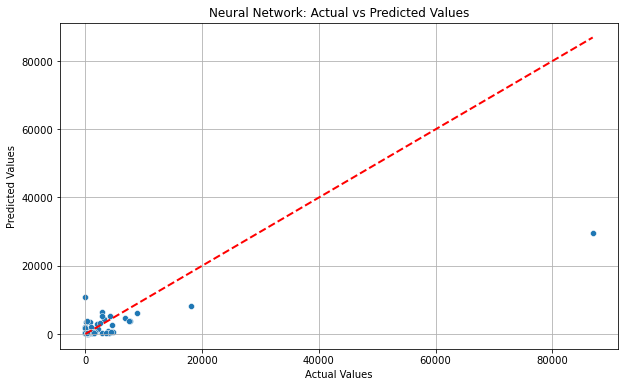

2025-03-25 21:58:10,676 - INFO - Plotting XGBoost: Actual vs Predicted Values
2025-03-25 21:58:10,677 - INFO - Creating Actual vs Predicted scatter plot


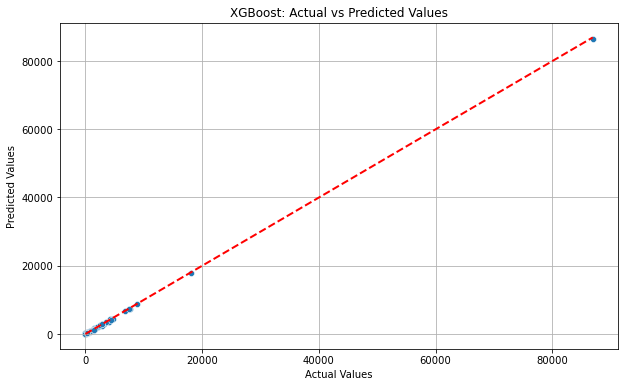

In [28]:
# Flatten the predictions to 1D array
try:
    logger.info("Flattening neural network predictions")
    nn_predictions_flat = nn_predictions.flatten()
except Exception as e:
    logger.error(f"Error flattening neural network predictions: {e}")
    raise

try:
    logger.info("Flattening XGBoost predictions")
    xgb_predictions_flat = xgb_predictions.flatten()
except Exception as e:
    logger.error(f"Error flattening XGBoost predictions: {e}")
    raise

# Plot Actual vs Predicted for Neural Network
try:
    logger.info("Plotting Neural Network: Actual vs Predicted Values")
    plot_actual_vs_predicted(
        y_test, 
        nn_predictions_flat, 
        title="Neural Network: Actual vs Predicted Values"
    )
except Exception as e:
    logger.error(f"Error plotting Neural Network Actual vs Predicted: {e}")
    raise

# Plot Actual vs Predicted for XGBoost
try:
    logger.info("Plotting XGBoost: Actual vs Predicted Values")
    plot_actual_vs_predicted(
        y_test, 
        xgb_predictions_flat, 
        title="XGBoost: Actual vs Predicted Values"
    )
except Exception as e:
    logger.error(f"Error plotting XGBoost Actual vs Predicted: {e}")
    raise

2025-03-25 21:58:10,901 - INFO - Generating predictions for Neural Network


3/3 [==============================] - 0s 4ms/step


2025-03-25 21:58:10,989 - INFO - Plotting Residuals for Neural Network
2025-03-25 21:58:10,991 - INFO - Creating Residual Analysis plots


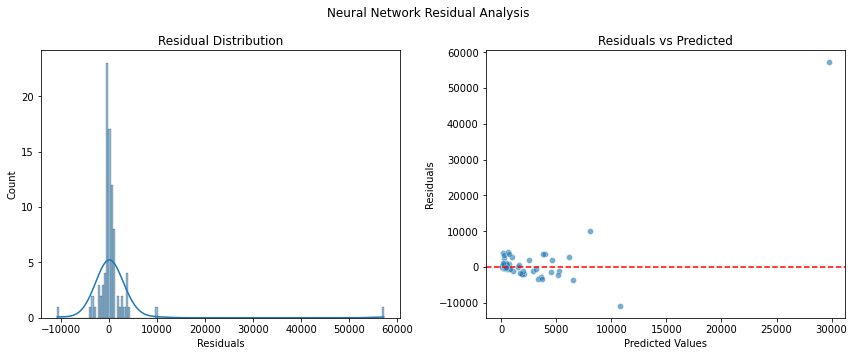

2025-03-25 21:58:11,777 - INFO - Generating predictions for XGBoost
2025-03-25 21:58:11,782 - INFO - Plotting Residuals for XGBoost
2025-03-25 21:58:11,783 - INFO - Creating Residual Analysis plots


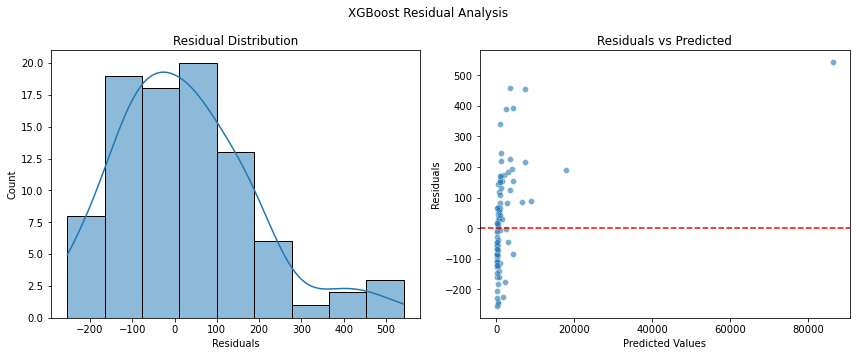

In [29]:
# For Neural Network
try:
    logger.info("Generating predictions for Neural Network")
    nn_predictions = trained_model.predict(X_test).flatten()
except Exception as e:
    logger.error(f"Error generating Neural Network predictions: {e}")
    raise

try:
    logger.info("Plotting Residuals for Neural Network")
    plot_residuals(
        y_true=y_test, 
        y_pred=nn_predictions, 
        title="Neural Network Residual Analysis"
    )
except Exception as e:
    logger.error(f"Error plotting Neural Network residuals: {e}")
    raise

# For XGBoost
try:
    logger.info("Generating predictions for XGBoost")
    xgb_predictions = xgb_model.predict(X_test).flatten()
except Exception as e:
    logger.error(f"Error generating XGBoost predictions: {e}")
    raise

try:
    logger.info("Plotting Residuals for XGBoost")
    plot_residuals(
        y_true=y_test, 
        y_pred=xgb_predictions, 
        title="XGBoost Residual Analysis"
    )
except Exception as e:
    logger.error(f"Error plotting XGBoost residuals: {e}")
    raise

2025-03-25 21:58:12,288 - INFO - Generating SHAP explanations with 100 samples
2025-03-25 21:58:12,290 - INFO - Using DeepExplainer for neural network models
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


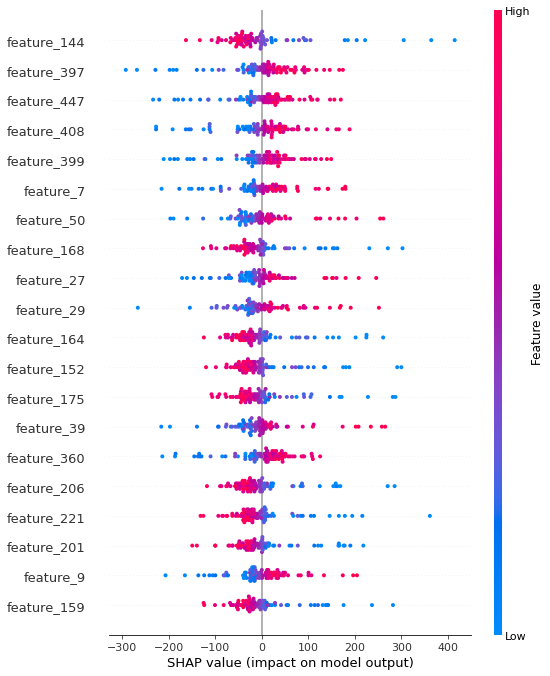

2025-03-25 21:58:14,673 - INFO - Calculating feature importance
2025-03-25 21:58:14,674 - INFO - Using permutation importance for neural network models
2025-03-25 21:58:14,677 - INFO - Starting comprehensive model evaluation
2025-03-25 21:58:14,678 - INFO - Making predictions on test data


Feature Importance Calculation Error: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x0000020E39544880> does not.
3/3 [==============================] - 0s 5ms/step


2025-03-25 21:58:14,779 - INFO - Calculating evaluation metrics
2025-03-25 21:58:14,781 - INFO - Calculating evaluation metrics
2025-03-25 21:58:14,784 - INFO - Calculated Metrics: {'MAE': 1823.4029674953886, 'RMSE': 6394.46724688561, 'R2': 0.5284707541609464}
2025-03-25 21:58:14,786 - INFO - Extracting feature importance
2025-03-25 21:58:14,787 - INFO - Calculating feature importance
2025-03-25 21:58:14,788 - INFO - Using permutation importance for neural network models
2025-03-25 21:58:14,793 - ERROR - Feature importance calculation error: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x0000020E39544880> does not.
2025-03-25 21:58:14,794 - INFO - Generating SHAP explanations
2025-03-25 21:58:14,796 - INFO - Generating SHAP explanations with 100 samples
2025-03-25 21:58:14,798 - INFO - Using DeepExplainer for neural network models
Your TensorFlow version is newer than 2.4.0 and so graph su

Feature importance calculation error: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x0000020E39544880> does not.


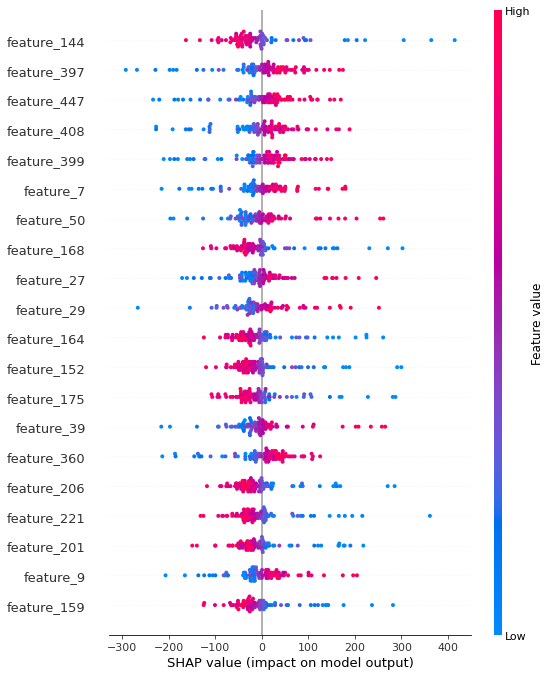

2025-03-25 21:58:16,417 - INFO - Creating evaluation visualizations
2025-03-25 21:58:16,418 - INFO - Creating Actual vs Predicted scatter plot


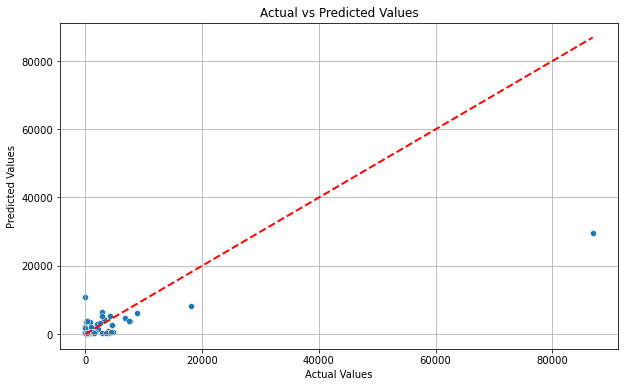

2025-03-25 21:58:16,657 - INFO - Creating Residual Analysis plots


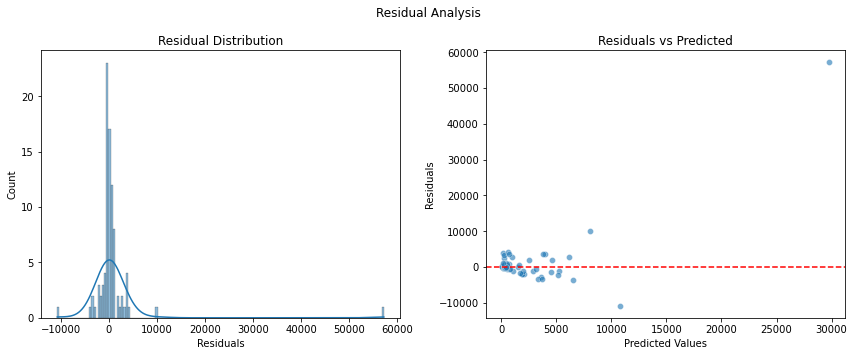

2025-03-25 21:58:17,483 - INFO - Evaluation report generation completed



Evaluation Report:
metrics: {'MAE': 1823.4029674953886, 'RMSE': 6394.46724688561, 'R2': 0.5284707541609464}
feature_importance: None
model_type: Sequential
limitations: ['Assumes linear relationships between features and target', 'Performance dependent on data quality', 'May not capture complex nonlinear interactions']


In [30]:
# SHAP Explanation Function Call
try:
    explain_with_shap(
        model=trained_model,  # Your trained Neural Network
        X=X_test.values if hasattr(X_test, 'values') else X_test,  # Ensure numpy array
        feature_names=X_test.columns.tolist() if hasattr(X_test, 'columns') else [f'feature_{i}' for i in range(X_test.shape[1])],
        n_samples=100  # Number of samples to explain
    )
except Exception as e:
    print(f"SHAP Explanation Error: {e}")

# Feature Importance Function Call
try:
    feature_importance = get_feature_importance(
        model=trained_model,  # Your trained Neural Network or Tree-based model
        X_test=X_test.values if hasattr(X_test, 'values') else X_test,  # Test feature matrix
        y_test=y_test,  # Test target values
        feature_names=X_test.columns.tolist() if hasattr(X_test, 'columns') else [f'feature_{i}' for i in range(X_test.shape[1])]
    )
    
    # Print feature importance
    print("Feature Importance:")
    for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance}")
except Exception as e:
    print(f"Feature Importance Calculation Error: {e}")

# Evaluation Report Generation Function Call
try:
    evaluation_report = generate_evaluation_report(
        model=trained_model,  # Your trained model
        X_test=X_test.values if hasattr(X_test, 'values') else X_test,  # Test features
        y_test=y_test,  # Test labels
        feature_names=X_test.columns.tolist() if hasattr(X_test, 'columns') else [f'feature_{i}' for i in range(X_test.shape[1])],
        n_shap_samples=100  # Number of samples for SHAP analysis
    )
    
    # Print evaluation report details
    print("\nEvaluation Report:")
    for key, value in evaluation_report.items():
        print(f"{key}: {value}")
except Exception as e:
    print(f"Evaluation Report Generation Error: {e}")


1/1 [==============================] - 0s 30ms/step
Test Data Evaluation:
Mean Absolute Error: 773.0443725585938
Mean Squared Error: 606484.397855586
Root Mean Squared Error: 778.7710818049076


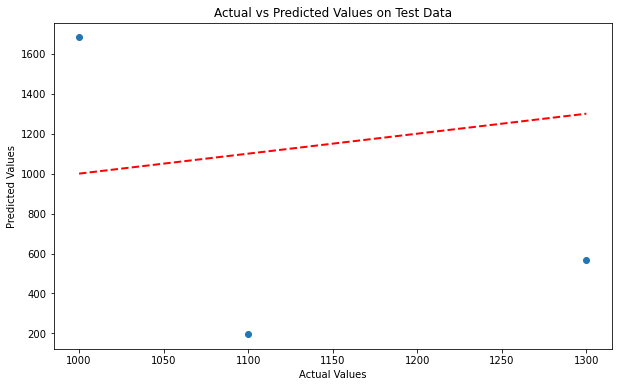

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test dataset
test_data = pd.read_csv(r"test.csv")  


X_test = test_data.iloc[:, 1:-1]  # Exclude ID column and target column
y_test = test_data['vomitoxin_ppb']  

# Scale the test data using the same scaler used during training
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Use the trained model to make predictions
y_pred = trained_model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

print("Test Data Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Test Data")
plt.show()

Test Data Evaluation:
Mean Absolute Error: 397.2058410644531
Mean Squared Error: 181695.82199082305
Root Mean Squared Error: 426.2579289477476


Text(0.5, 1.0, 'Actual vs Pred')

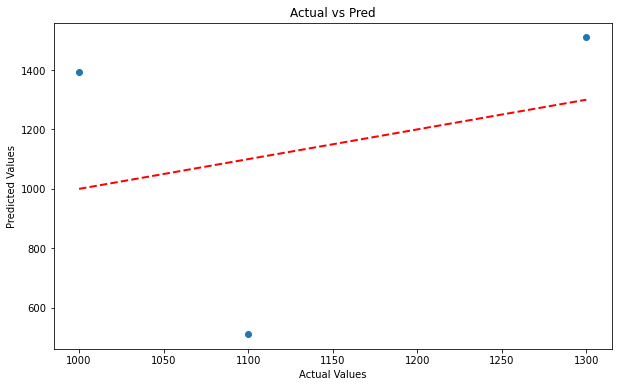

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test dataset
test_data = pd.read_csv(r"test.csv") 


X_test = test_data.iloc[:, 1:-1]  # Exclude ID column and target column
y_test = test_data['vomitoxin_ppb']  

# Scale the test data using the same scaler used during training
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)


y_pred = xgb_model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

print("Test Data Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Pred")

In [40]:
import pickle

# Save the XGBoost model
with open('xgb_vomitoxin_model.pickle', 'wb') as f:
    pickle.dump(xgb_model, f)

# Optionally, save the scaler as well since you'll need it for preprocessing
with open('xgb_vomitoxin_scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)